In [4]:
%matplotlib notebook

In [5]:
from forced_barotropic_sphere.sphere import Sphere
from forced_barotropic_sphere.solver import Solver
from forced_barotropic_sphere.forcing import Forcing
#import bm_methods.bm_methods
import forced_barotropic_sphere.plotting as plotters
import forced_barotropic_sphere.ensemble_methods as ensemble_methods
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl          # Plotting routines
import matplotlib.pyplot as plt    
import matplotlib.animation as manim
import matplotlib.ticker as mticker
from IPython.display import display, clear_output, HTML, FileLink  # Some technical stuff, used to display animation
#from ipywidgets import FloatProgress
from ipykernel.pylab.backend_inline import flush_figures
import cartopy                   # Map projection stuff
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Test a single model run

integrating for  27.77777777777778  days, with a dt of  0.046296296296296294  days


<IPython.core.display.Javascript object>


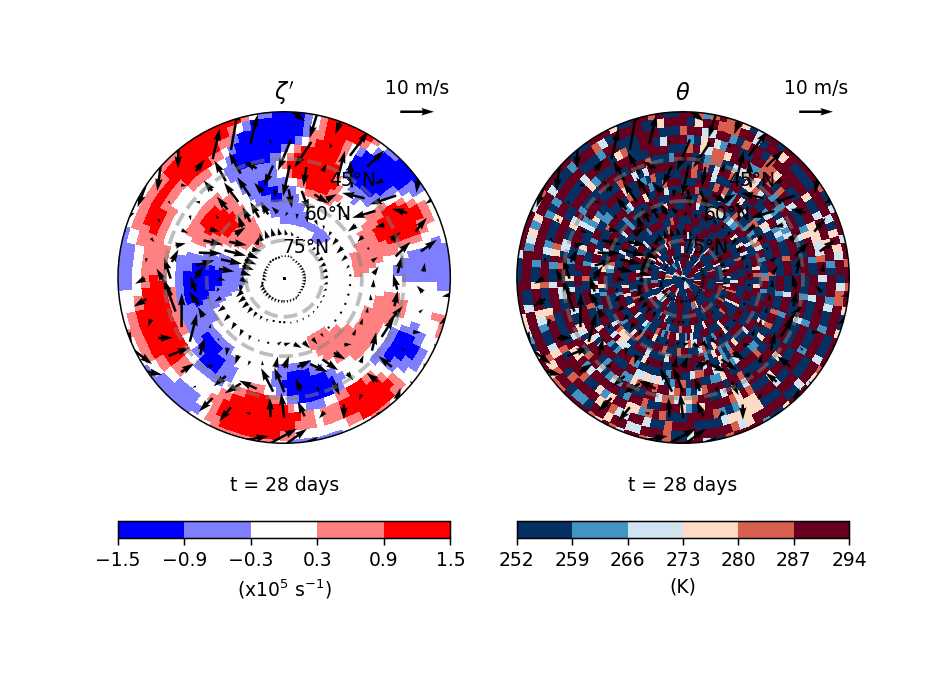

In [10]:
dt = 4000 #time between integration steps (seconds)
Nt = 600 #number of integration steps
T= Nt*dt #total integration time
print('integrating for ', T/86400, ' days, with a dt of ', dt/86400, ' days')

ofreq = 6

#T42 resolution
nlat=64; nlon=128
st = Sphere(nlat,nlon)
F = Forcing(st,dt,T)
Si = F.generate_rededdy_start()
forcing_tseries = F.generate_rededdy_tseries(A=5e-12,Si=Si)

k0=6
vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)
thetap = np.zeros(vortp.shape)
vortp = np.zeros(thetap.shape)
ics = np.array([vortp,thetap])

sln = Solver(st, forcing=F, ofreq=ofreq).integrate_dynamics(temp_linear=False, vort_linear=True)
tidx=int(Nt/ofreq)-1
f,ax = plotters.plot_overview(sln.isel(time=tidx), levels=[np.linspace(-1.5,1.5,6),np.arange(252,300,7)], perturbation=[True,False])
#f.savefig('./images/L18_singlerun.png',dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


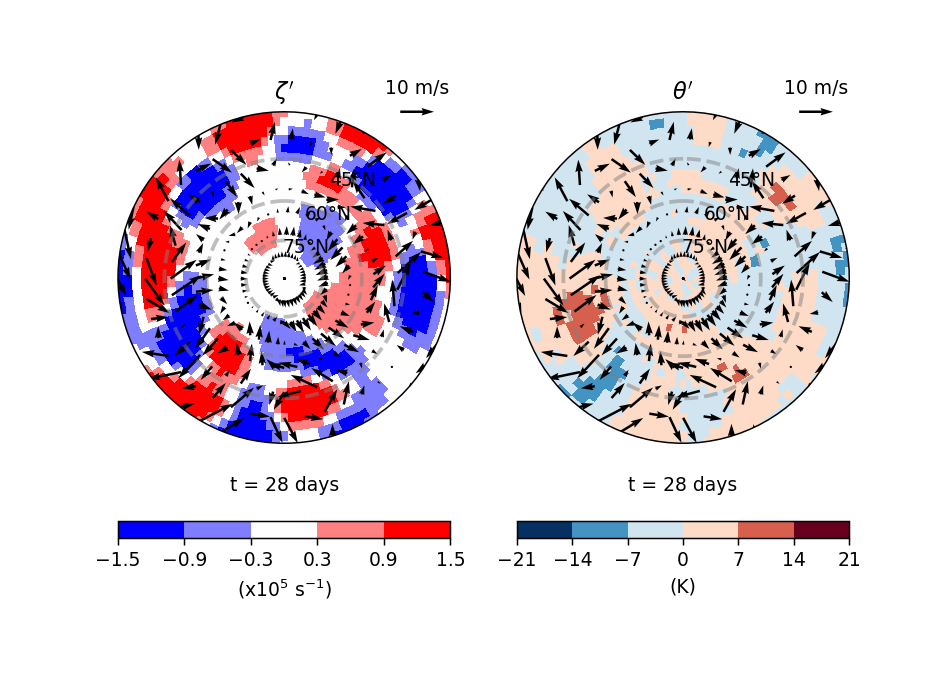

In [7]:
f,ax = plotters.plot_overview(sln.isel(time=tidx), levels=[np.linspace(-1.5,1.5,6),np.arange(-21,22,7)], perturbation=[True,True])


<IPython.core.display.Javascript object>


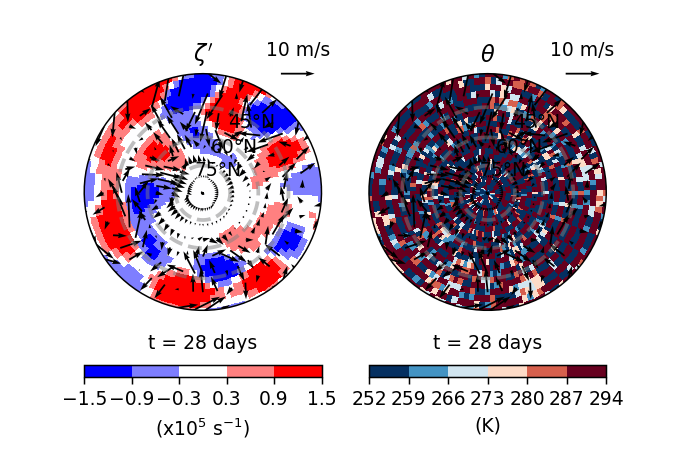

MovieWriter ffmpeg unavailable; using Pillow instead.


In [11]:
#uncomment for animation of sln, this can take a while depending on integral time
plotters.overview_animation(sln, levels=[np.linspace(-1.5,1.5,6),np.arange(252,300,7)], perturbation=[True,False], filename = './images/simpleevo.gif')

# Testing some ensemble methods

In [7]:
num_members= 50 #num of members in the ensemble
ofreq=5

thetap = np.zeros((nlat,nlon))
vortp = np.zeros((nlat,nlon))

#k0=6
#vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)

ics = np.array([vortp,thetap])
ensemble = ensemble_methods.integrate_ensemble(nlat,nlon,dt=dt, T=T, ofreq=ofreq, ics=ics,
                                               forcing_type='red_eddy', n_ens=num_members, temp_linear=True,
                                               vort_linear=True)

tidx=int(Nt/ofreq)-1

100%|███████████████████████████████████████████| 50/50 [01:28<00:00,  1.77s/it]


<IPython.core.display.Javascript object>


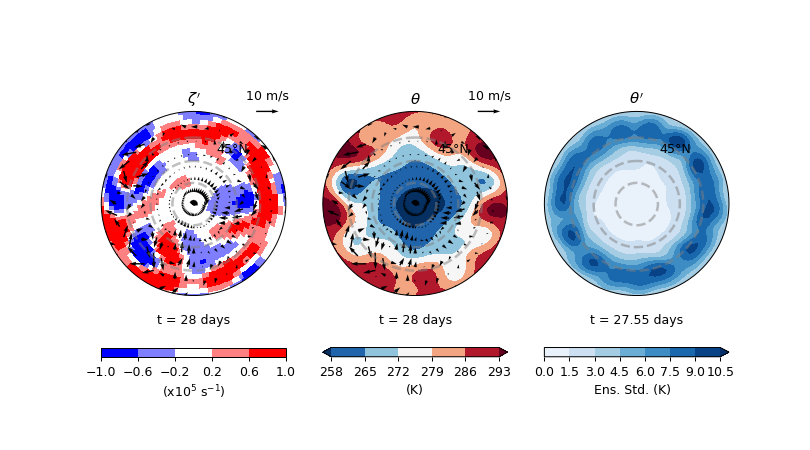

In [8]:
f,axs=plotters.plot_ensemble_overview(ensemble.isel(time=tidx), perturbation=[True,False],
                                      levels=[np.linspace(-1,1,6),np.arange(258,300,7),None])

<IPython.core.display.Javascript object>


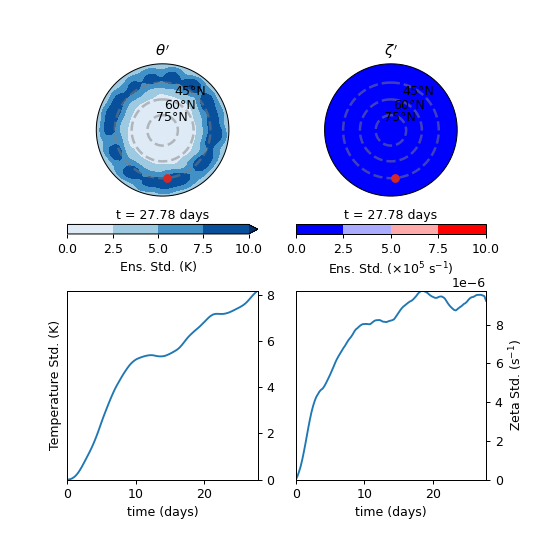

MovieWriter ffmpeg unavailable; using Pillow instead.


In [9]:
plotters.ensspread_animation(ensemble, xy=(5,45),levels = [np.linspace(0,10,5), np.linspace(0,10,5)],  filename='./images/ensspread_evolution_rn.gif')